# Credit card Analysis

In [29]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Load the data
Customer_Acq = pd.read_csv("C:/Users/user/Downloads/Analytics Lab Class Files/Python/Case Study/Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")

# Q1 In the above dataset :

a. In case age is less than 18, replace it with mean of age values.

In [31]:
Customer_Acq = pd.DataFrame(Customer_Acq)
Customer_Acq['Age'] = np.where(Customer_Acq['Age'] <18,Customer_Acq.Age.mean(),Customer_Acq.Age)
Customer_Acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [32]:
Spend_amt = pd.read_csv('C:/Users/user/Downloads/Analytics Lab Class Files/Python/Case Study/Case Study 2 - Credit Card Case Study/spend.csv')

In [33]:
#Merging Spend and Customer Acquistion csv files
CustAcq_spend= pd.merge(left = Customer_Acq,
               right = Spend_amt,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner')
Cust_limit = 0.50*CustAcq_spend.Limit
CustAcq_spend.loc[CustAcq_spend['Amount']>CustAcq_spend['Limit'],['Amount','Limit']] = Cust_limit
CustAcq_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


 c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [34]:
Repayment = pd.read_csv('C:/Users/user/Downloads/Analytics Lab Class Files/Python/Case Study/Case Study 2 - Credit Card Case Study/Repayment.csv')

In [35]:
#Merging Repayment and Customer Acquistion csv files
CustAcq_Repayment = pd.merge(left = Customer_Acq,
               right = Repayment,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner')
CustAcq_Repayment.loc[CustAcq_Repayment['Amount']>CustAcq_Repayment['Limit'],['Amount','Limit']] = CustAcq_Repayment.Limit
CustAcq_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,100000.00,NaN
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,10000.00,NaN
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,10001.00,NaN
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,10002.00,NaN


# Q2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [36]:
Customer_Acq.Customer.nunique()

100

b. How many distinct categories exist?

In [37]:
print("Product ",CustAcq_spend.Product.nunique())
print("Segment ",CustAcq_spend.Segment.nunique())
print("Type   ",CustAcq_spend.Type.nunique())

Product  3
Segment  5
Type    15


c. What is the average monthly spend by customers?

In [38]:
CustAcq_spend['Month'] = pd.to_datetime(CustAcq_spend['Month'])
CustAcq_spend['month'] = CustAcq_spend['Month'].dt.month
avg_month_spend = CustAcq_spend.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_spend))

Amount
Customer month               
A1       1      372762.587143
         2      175235.690000
         4      261649.250000
         5      361141.310000
         8      344372.100000
...                       ...
A95      1      240401.500000
A96      1       54729.660000
A97      1        5000.000000
A98      1        5000.500000
A99      1        5001.000000

[578 rows x 1 columns]

d. What is the average monthly repayment by customers?

In [39]:
CustAcq_Repayment['Month'] = pd.to_datetime(CustAcq_Repayment['Month'])
CustAcq_Repayment['month'] = CustAcq_Repayment['Month'].dt.month
avg_month_repay = CustAcq_Repayment.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_repay))

Amount
Customer month               
A1       1      343972.327143
         2      156374.760000
         4      254474.580000
         7      297176.740000
         9      186427.500000
...                       ...
A95      1      369405.960000
A96      1      100000.000000
A97      1       10000.000000
A98      1       10001.000000
A99      1       10002.000000

[558 rows x 1 columns]

e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [40]:
profit = CustAcq_Repayment.Amount - CustAcq_spend.Amount
CustAcq_Repayment['profit'] = profit
profit_mon = CustAcq_Repayment.groupby(["month"])['profit'].sum()

profit_mon

month
1     3018156.34
2     6019844.45
3     1879245.23
4     4546796.37
5     4055837.08
6      259114.30
7     2033936.92
8      696750.47
9      436487.18
10     395570.00
11     943080.18
12     916456.34
Name: profit, dtype: float64

f. What are the top 5 product types?

In [41]:
Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)
t = (Top_5).reset_index()
display(t)

C:\Users\user\AppData\Local\Temp\ipykernel_12204\268396479.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)


,Type,Sl No:,Amount
0,PETRO,146920,49863174.09
1,CAMERA,113612,41481571.96
2,FOOD,110164,37773338.43
3,TRAIN TICKET,90087,33067077.15
4,AIR TICKET,117877,32955445.42


g. Which city is having maximum spend?

In [42]:
group_city = CustAcq_spend.groupby(['City'])['Amount'].sum()
group_city.nlargest(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

In [43]:
h. Which age group is spending more money?

Object `money` not found.


In [44]:
group_age = CustAcq_spend.groupby('Age').sum()
amount_spend =  group_age['Amount']
amount_spend.nlargest(1)

C:\Users\user\AppData\Local\Temp\ipykernel_12204\3702372608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_age = CustAcq_spend.groupby('Age').sum()


Age
28.0    17365270.23
Name: Amount, dtype: float64

i. Who are the top 10 customers in terms of repayment?

In [45]:
Top_10 = CustAcq_Repayment.groupby('Customer').sum().sort_values("Amount",ascending = False).head(10)
t = Top_10
display(t)

C:\Users\user\AppData\Local\Temp\ipykernel_12204\2748266384.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_10 = CustAcq_Repayment.groupby('Customer').sum().sort_values("Amount",ascending = False).head(10)


,No,Age,Limit,SL No:,Amount,Unnamed: 4,month,profit
Customer,,,,,,,,
A61,2318,1672.00,19000000.0,45502.0,10539142.91,0.0,159,1536816.52
A60,2280,1064.00,19000000.0,45464.0,9876290.74,0.0,146,-1144640.24
A13,403,899.00,15500000.0,10148.0,9572000.66,0.0,134,1340393.40
A43,1333,651.00,15500000.0,31424.0,8489871.46,0.0,117,1782083.54
A45,1395,2077.00,15500000.0,31486.0,8448334.87,0.0,119,1458090.77
A12,372,1581.00,15500000.0,10117.0,8334760.16,0.0,123,151709.52
A14,434,1441.19,15500000.0,10179.0,7943268.63,0.0,137,282182.43
A44,1364,868.00,15500000.0,31455.0,7744730.12,0.0,126,1555390.87
A39,1209,2418.00,15500000.0,31300.0,7622483.30,0.0,142,-128024.92


# Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

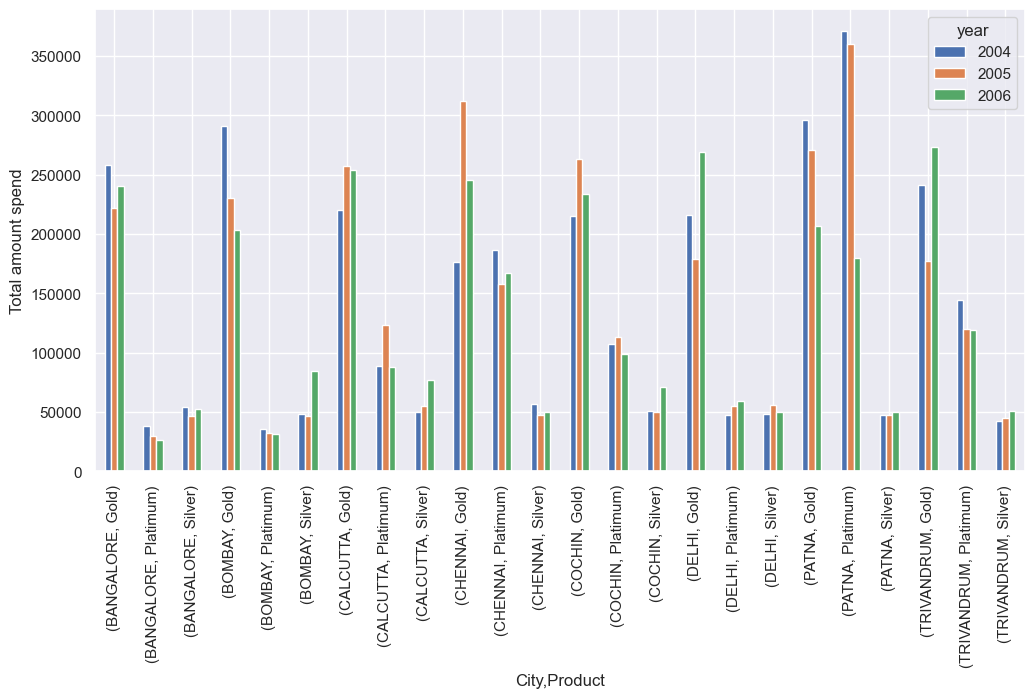

In [46]:
CustAcq_spend['Month'] = pd.to_datetime(CustAcq_spend['Month'])
CustAcq_spend['year'] = CustAcq_spend['Month'].dt.year
tot_amount = CustAcq_spend.groupby(["City","Product","year"])["Amount"].sum().add_prefix("Total_")           
tot_amount


#Graph
sns.set()
pd.pivot_table(CustAcq_spend, index =['City','Product'],columns ='year',values ='Amount').plot.bar(figsize=(12,6))
plt.ylabel('Total amount spend')
plt.show()

# Q4. Create graphs for -

a. Monthly comparison of total spends, city wise

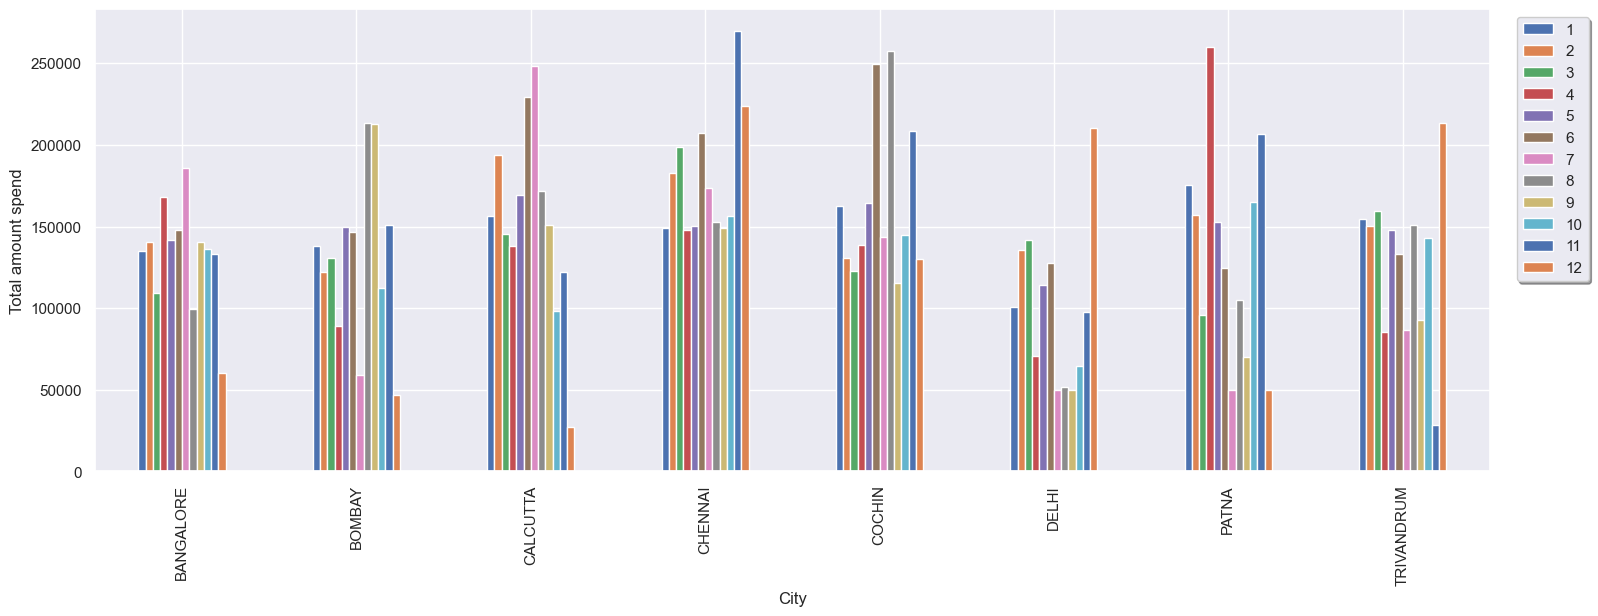

In [47]:
# sns.set()
# pd.pivot_table(df1, index ='Month',columns = 'City',values = 'Amount').plot(kind='bar')
# plt.ylabel("Total amount spend")
CustAcq_spend['Month'] = pd.to_datetime(CustAcq_spend['Month'])
CustAcq_spend['month'] = CustAcq_spend['Month'].dt.month
sns.set()
pd.pivot_table(CustAcq_spend, index ='City',columns ='month',values="Amount").plot(kind='bar',figsize=(18,6))
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.045,1), shadow=True, ncol=1)
plt.ylabel('Total amount spend')
plt.show()

b. Comparison of yearly spend on air tickets

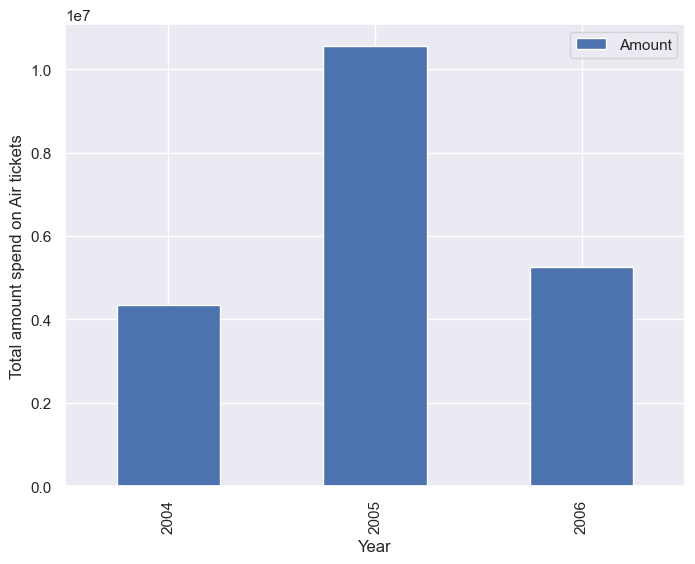

In [48]:
CustAcq_spend['Month'] = pd.to_datetime(CustAcq_spend['Month'])
CustAcq_spend['Year'] = CustAcq_spend['Month'].dt.year

s = CustAcq_spend.loc[(CustAcq_spend.Type == 'AIR TICKET')]
spend = s.groupby(['Year']).aggregate({'Amount':'sum'})

spendgraph=spend.plot.bar(figsize=(8,6))
plt.legend()
plt.ylabel('Total amount spend on Air tickets')
plt.show()

c. Comparison of monthly spend for each product

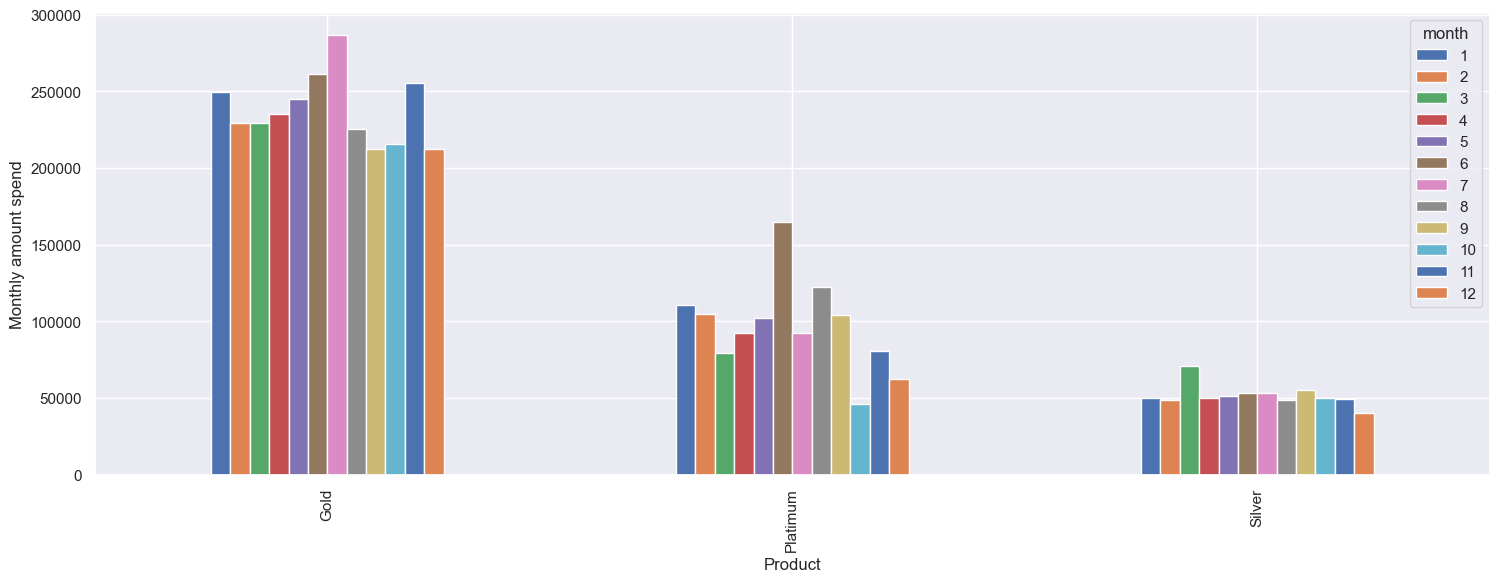

In [49]:
CustAcq_spend['Month'] = pd.to_datetime(CustAcq_spend['Month'])
CustAcq_spend['month'] = CustAcq_spend['Month'].dt.month
tot_amount = CustAcq_spend.groupby(["Product","month"])["Amount"].sum().add_prefix("Total_")            
tot_amount


#Graph
sns.set()
pd.pivot_table(CustAcq_spend, index ='Product',columns ='month',values ='Amount').plot.bar(figsize=(18,6))
plt.ylabel('Monthly amount spend')
plt.show()

# Q5.Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [50]:
CustAcq_Repayment['Month'] = pd.to_datetime(CustAcq_Repayment['Month'])

#creating new column yearly and monthly
CustAcq_Repayment['Monthly'] = CustAcq_Repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format= "%B"))
CustAcq_Repayment['yearly'] = CustAcq_Repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format= "%Y"))

CustAcq_Repayment.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,month,profit,Monthly,yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,NaN,1,9943.95,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,NaN,1,-164657.11,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,NaN,1,235749.60,January,2004


In [52]:
data = CustAcq_Repayment

# Prompt user for inputs
product = input("Enter product (Gold/Silver/Platinum): ")
time_period = input("Enter time period (yearly/monthly): ")

def find_top_customers(data, product, time_period):
    
    # Filter data based on product and time period 
    filtered_data = data[(data['Product'] == product) & (data['yearly'] == time_period)]

    # Group data by city and customer and calculate repayment amount
    grouped_data = filtered_data.groupby(['City', 'Customer']).sum('Amount')

    # Sort data by repayment amount within each city
    sorted_data = grouped_data.sort_values(by='Amount', ascending=False)

    # Get top 10 customers for each city
    top_customers = sorted_data.groupby('City').head(10)

    return top_customers

# Find top 10 customers
top_customers = find_top_customers(data, product, time_period)

# Display the results
print("Top 10 customers for each city:")
print(top_customers)


Enter product (Gold/Silver/Platinum): Gold
Enter time period (yearly/monthly): 2004
Top 10 customers for each city:
                      No     Age      Limit   SL No:      Amount  Unnamed: 4  \
City       Customer                                                            
BOMBAY     A42       504  600.00  6000000.0  12046.0  3045914.71         0.0   
CALCUTTA   A60       600  280.00  5000000.0  11445.0  2890721.81         0.0   
BANGALORE  A14       126  418.41  4500000.0   3123.0  2770261.30         0.0   
COCHIN     A45       495  737.00  5500000.0  11996.0  2557947.39         0.0   
           A61       671  484.00  5500000.0  13707.0  2518154.95         0.0   
BANGALORE  A1          7  532.00  3500000.0    458.0  2359797.84         0.0   
BOMBAY     A12        96  408.00  4000000.0   2544.0  2339080.90         0.0   
BANGALORE  A13        78  174.00  3000000.0   1998.0  2337012.77         0.0   
DELHI      A44       396  252.00  4500000.0   9165.0  2149383.50         0.0   
BANG